# Drawing a log\(P\)-h Diagram
---

CoolProp has built-in functionality to draw the log\(P\)-h diagram of a refrigerant, together with some means to draw a simple vapor compression cycle on this diagram. Based on CoolProp's functionality a small wrapper class `LogPhDiagram` in package `hvac.charts` has been developed to draw the log\(P\)-h diagram of a refrigerant quickly. 

In [1]:
from deps import load_packages
load_packages()

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# make diagrams interactive
# %matplotlib widget

In [2]:
from hvac import Quantity
from hvac.fluids import Fluid
from hvac.charts import StandardVaporCompressionCycle, LogPhDiagram

In [3]:
Q_ = Quantity

## Drawing an Empty log\(P\)-h Diagram

First we need a refrigerant. Let's take R410A for example:

In [4]:
R410A = Fluid('R410A')

To create the log\(P\)-h diagram for R410A and show it, the code below will do it:

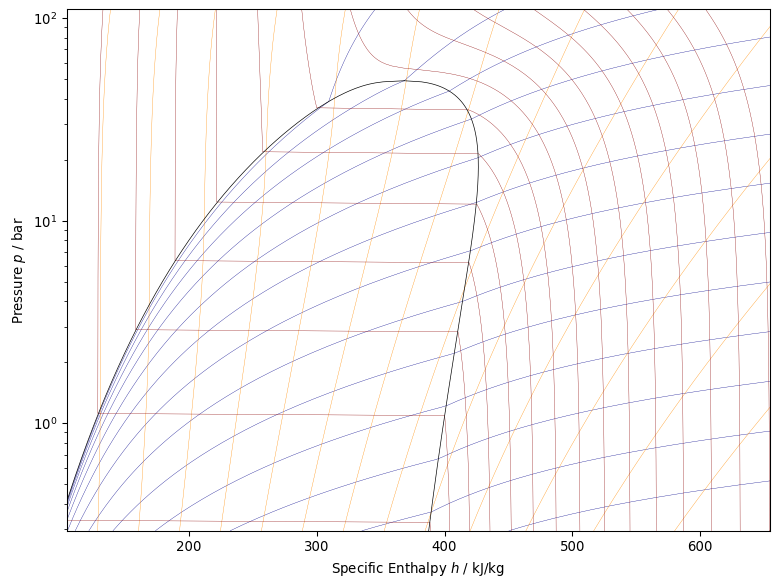

In [5]:
R410A_diagram1 = LogPhDiagram(R410A, size=(8, 6), dpi=96)

# hide the header and footer of the figure
R410A_diagram1.figure.canvas.header_visible = False
R410A_diagram1.figure.canvas.footer_visible = False

R410A_diagram1.show()

## Drawing a Standard Vapor Compression Cycle on the log\(P\)-h Diagram

A standard vapor compression cycle is described by:
- the refrigerant
- the evaporation temperature
- the condensation temperature
- the degree of superheat of the refrigerant vapor at the exit of the evaporator (useful superheat)
- any additional superheating of the refrigerant vapor in the suction line between the evaporator outlet and the compressor inlet
- the degree of subcooling of the refrigerant liquid at the exit of the condenser or the entrance of the expansion device
- the isentropic efficiency of the compressor

For example let's consider the following standard vapor compression cycle:
- refrigerant: R410A
- evaporation temperature: 5 °C
- useful superheat: 10 K
- additional superheat: None
- condensation temperature: 50 °C
- subcooling: 10 K
- isentropic efficiency: 73.88 %

We need first to create an instance of class `StandardVaporCompressionCycle` with the data from above:

In [6]:
cycle_R410A_1 = StandardVaporCompressionCycle(
    Refrigerant=R410A,
    evaporationTemperature=Q_(5, 'degC'),
    condensationTemperature=Q_(50, 'degC'),
    evaporatorSuperheat=Q_(10, 'K'),
    subCooling=Q_(10, 'K'),
    suctionLineSuperheat=None,
    isentropicEfficiency=Q_(73.88, 'pct')
)

Next, we instantiate class `LogPhDiagram` passing in the cycle we've just created and call `show()` on the diagram:

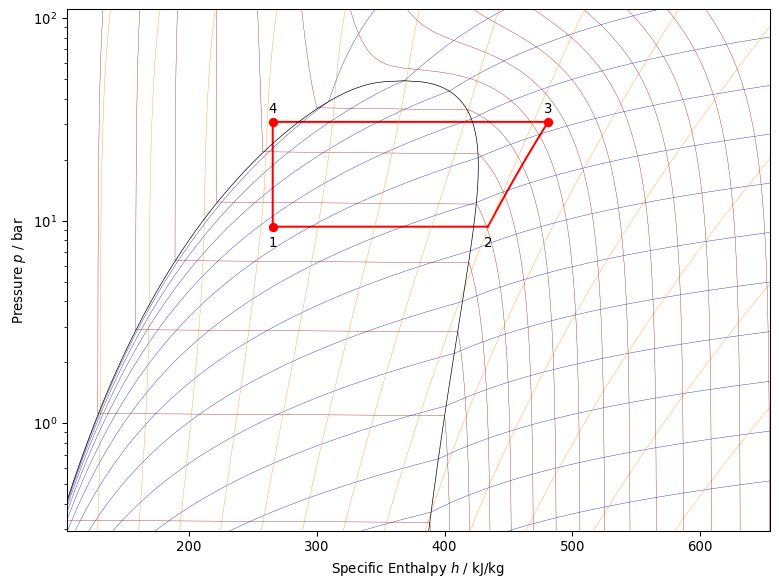

In [7]:
R410A_diagram2 = LogPhDiagram(R410A, size=(8, 6), dpi=96)
R410A_diagram2.setCycle(cycle_R410A_1)
R410A_diagram2.show()